In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
#Loading the dataset
df = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
#Checking for null values
df.isnull().sum().sum()

0

In [12]:
#Checking for duplicated
df.duplicated().sum()

24206

In [13]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

In [14]:
df['Diabetes'] = df['Diabetes_binary']
df.drop(columns = 'Diabetes_binary', inplace=True)

In [15]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

HighBP 
 0.0    125214
1.0    104260
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0.0    128129
1.0    101345
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    220176
0.0      9298
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0.0    122585
1.0    106889
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0.0    219190
1.0     10284
Name: Stroke, dtype: int64
-------------------

Text(0.5, 1.0, 'Correlation Heatmap')

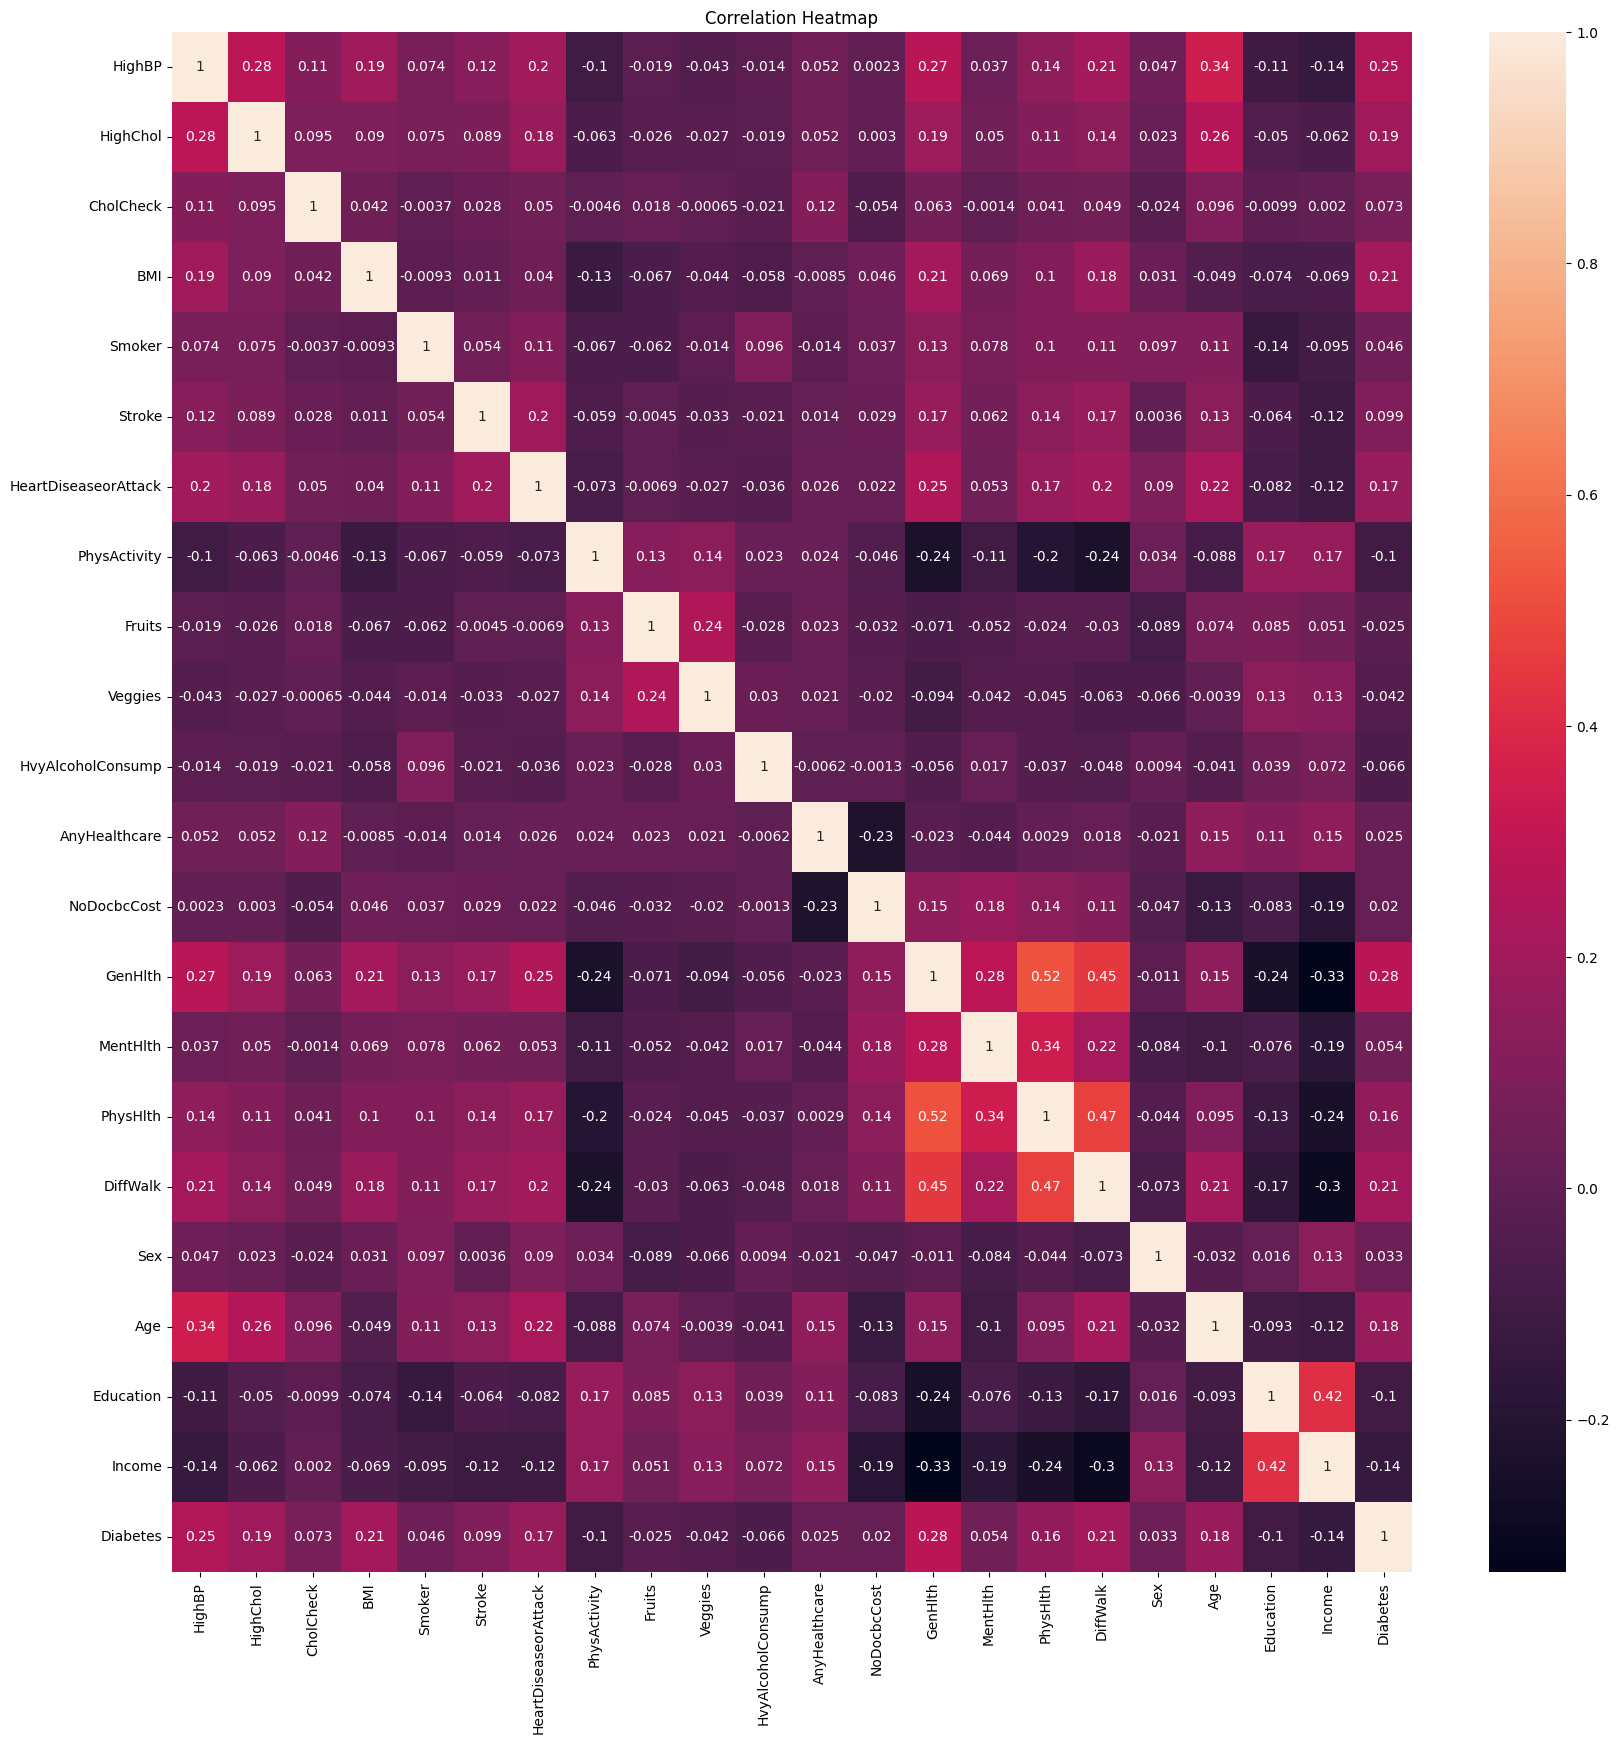

In [16]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_slover = ''
train_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(X_train, y_train)
    train_score[i] = lr.score(X_test, y_test)
    if lr.score(X_test, y_test) == train_score.max():
        best_slover = n

lr = LogisticRegression(solver=best_slover)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

LogisticRegression Score: 0.849373570105676


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees's Accuracy:  0.7209935722845626


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, lr_pred))
print('f1 Score :', f1_score(y_test, lr_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, lr_pred))
print('R2 Score : ',r2_score(y_test, lr_pred))

Accuracy Score : 0.849373570105676
f1 Score : 0.8102760048559708
Mean Absolute Error : 0.150626429894324
Mean Squared Error :  0.150626429894324
R2 Score :  -0.1542471114712025


In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, dtc_pred))
print('f1 Score :', f1_score(y_test, dtc_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, dtc_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, dtc_pred))
print('R2 Score : ',r2_score(y_test, dtc_pred))

Accuracy Score : 0.7209935722845626
f1 Score : 0.7567270217569475
Mean Absolute Error : 0.27900642771543743
Mean Squared Error :  0.27900642771543743
R2 Score :  -1.13802028965554


Text(0.5, 1.0, 'f1_score')

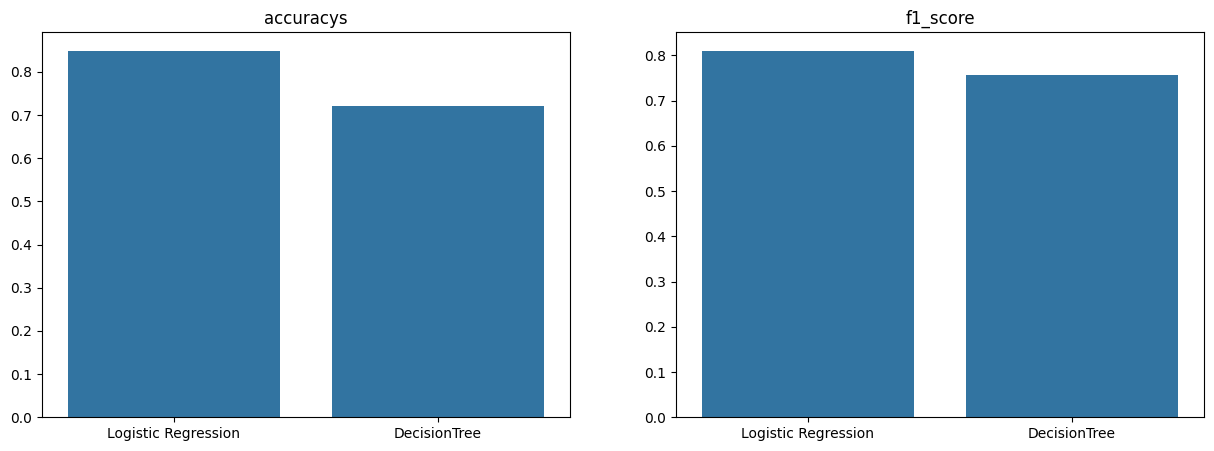

In [22]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree']
preds = [lr_pred,dtc_pred]
accuracys= []
f1 = []
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
    f1.append(f1_score(y_test, i, average="weighted"))
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=models, y=accuracys, ax=ax[0]).set_title('accuracys')
sns.barplot(x=models, y=f1, ax=ax[1]).set_title('f1_score')

In [27]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [29]:
import numpy as np

# Example input data
input_data = {'HighBP': 1.0,
              'HighChol': 1.0,
              'CholCheck': 1.0,
              'BMI': 40.0,
              'Smoker': 1.0,
              'Stroke': 0.0,
              'HeartDiseaseorAttack': 0.0,
              'PhysActivity': 0.0,
              'Fruits': 0.0,
              'Veggies': 1.0,
              'HvyAlcoholConsump':0.0,
              'AnyHealthcare':0.0,
              'NoDocbcCost':0.0,
              'GenHlth':5.0,
              'MentHlth':18.0,
              'PhysHlth':15.0,
              'DiffWalk':1.0,
              'Sex':0.0,
              'Age':9.0,
              'Education':4.0,
              'Income':3.0}


input_array = np.array([[input_data['HighBP'],
                         input_data['HighChol'],
                         input_data['CholCheck'],
                         input_data['BMI'],
                         input_data['Smoker'],
                         input_data['Stroke'],
                         input_data['HeartDiseaseorAttack'],
                         input_data['PhysActivity'],
                         input_data['Fruits'],
                         input_data['Veggies'],
                         input_data['HvyAlcoholConsump'],
                         input_data['AnyHealthcare'],
                         input_data['NoDocbcCost'],
                         input_data['GenHlth'],
                         input_data['MentHlth'],
                         input_data['PhysHlth'],
                         input_data['DiffWalk'],
                         input_data['Sex'],
                         input_data['Age'],
                         input_data['Education'],
                         input_data['Income']]])
# Make a prediction
prediction = Ctree.predict(input_array)

# Print the prediction
print("Model Prediction:", prediction)

if (prediction[0]==0):
  print("No Diabetic")
else:
  print("Diabetic")

Model Prediction: [1.]
Diabetic


In [30]:
import pickle
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(lr, file)